<a href="https://colab.research.google.com/github/Al-ameen007/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the data and some preprocessing

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalizing the data and one-hot encoding the labels
from tensorflow.keras.utils import to_categorical
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# Splitting the data into training and validation sets as we want to save the test set for the evaluation of the best model
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [5]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

In [6]:
saved_models = []
histories = []

#Base Model

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), strides=(2, 2),activation='relu', kernel_initializer='truncated_normal', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
opt = optimizers.SGD(learning_rate=0.0001, momentum=0.9)
opt_1 = optimizers.SGD(learning_rate=0.05, momentum=0.9)
opt_2 = optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
opt_4 = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
opt_5 = optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.1,)

In [9]:
def evaluate_model(saved_models, X, y):
  best_model, best_model_idx = saved_models[0], 0
  best_accuracy= (best_model.evaluate(X, y, verbose=1))[1]
  for i in range(1, len(saved_models)):
    loss, acc = saved_models[i].evaluate(X, y, verbose=1)
    if acc > best_accuracy:
      best_model, best_model_idx , best_accuracy= saved_models[i], i, acc
  print('model: ' + str(best_model_idx + 1), 'accuracy: ' + str('%.2f'%(best_accuracy * 100) + ' %'))
  return best_model, best_model_idx

In [10]:
def summaries(saved_models):
  for i in range(0, len(saved_models)):
    print('model: ' + str(i + 1))
    saved_models[i].summary()

#Trying differnt number of epochs

In [11]:
model_1 = keras.models.clone_model(model)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_1_history = model_1.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_1)
histories.append(model_1_history)

Epoch 1/10
1594/1594 [==============================] - 28s 17ms/step - loss: 2.0725 - accuracy: 0.4577 - val_loss: 1.6860 - val_accuracy: 0.6969
Epoch 2/10
1594/1594 [==============================] - 17s 11ms/step - loss: 1.1577 - accuracy: 0.7608 - val_loss: 0.7856 - val_accuracy: 0.7986
Epoch 3/10
1594/1594 [==============================] - 17s 11ms/step - loss: 0.6376 - accuracy: 0.8350 - val_loss: 0.5375 - val_accuracy: 0.8528
Epoch 4/10
1594/1594 [==============================] - 17s 10ms/step - loss: 0.4832 - accuracy: 0.8695 - val_loss: 0.4384 - val_accuracy: 0.8799
Epoch 5/10
1594/1594 [==============================] - 17s 10ms/step - loss: 0.4122 - accuracy: 0.8874 - val_loss: 0.3860 - val_accuracy: 0.8904
Epoch 6/10
1594/1594 [==============================] - 16s 10ms/step - loss: 0.3700 - accuracy: 0.8969 - val_loss: 0.3510 - val_accuracy: 0.9013
Epoch 7/10
1594/1594 [==============================] - 17s 11ms/step - loss: 0.3413 - accuracy: 0.9046 - val_loss: 0.3257 -

In [12]:
model_2 = keras.models.clone_model(model)
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_2_history = model_2.fit(X_train, y_train, epochs=15, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_2)
histories.append(model_2_history)

Epoch 1/15
1594/1594 [==============================] - 17s 10ms/step - loss: 2.0953 - accuracy: 0.4286 - val_loss: 1.7679 - val_accuracy: 0.6372
Epoch 2/15
1594/1594 [==============================] - 16s 10ms/step - loss: 1.2606 - accuracy: 0.7366 - val_loss: 0.8585 - val_accuracy: 0.7999
Epoch 3/15
1594/1594 [==============================] - 16s 10ms/step - loss: 0.6755 - accuracy: 0.8337 - val_loss: 0.5632 - val_accuracy: 0.8506
Epoch 4/15
1594/1594 [==============================] - 17s 11ms/step - loss: 0.4985 - accuracy: 0.8688 - val_loss: 0.4540 - val_accuracy: 0.8773
Epoch 5/15
1594/1594 [==============================] - 17s 11ms/step - loss: 0.4235 - accuracy: 0.8837 - val_loss: 0.3981 - val_accuracy: 0.8904
Epoch 6/15
1594/1594 [==============================] - 16s 10ms/step - loss: 0.3816 - accuracy: 0.8934 - val_loss: 0.3632 - val_accuracy: 0.8973
Epoch 7/15
1594/1594 [==============================] - 16s 10ms/step - loss: 0.3536 - accuracy: 0.8997 - val_loss: 0.3386 -

In [13]:
model_3 = keras.models.clone_model(model)
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_3_history = model_3.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_3)
histories.append(model_3_history)

Epoch 1/20
1594/1594 [==============================] - 17s 11ms/step - loss: 2.1106 - accuracy: 0.4171 - val_loss: 1.8042 - val_accuracy: 0.6122
Epoch 2/20
1594/1594 [==============================] - 16s 10ms/step - loss: 1.3073 - accuracy: 0.7200 - val_loss: 0.8888 - val_accuracy: 0.7953
Epoch 3/20
1594/1594 [==============================] - 17s 11ms/step - loss: 0.6936 - accuracy: 0.8286 - val_loss: 0.5743 - val_accuracy: 0.8480
Epoch 4/20
1594/1594 [==============================] - 17s 11ms/step - loss: 0.5108 - accuracy: 0.8627 - val_loss: 0.4664 - val_accuracy: 0.8728
Epoch 5/20
1594/1594 [==============================] - 17s 11ms/step - loss: 0.4347 - accuracy: 0.8793 - val_loss: 0.4090 - val_accuracy: 0.8871
Epoch 6/20
1594/1594 [==============================] - 17s 10ms/step - loss: 0.3901 - accuracy: 0.8904 - val_loss: 0.3715 - val_accuracy: 0.8987
Epoch 7/20
1594/1594 [==============================] - 17s 10ms/step - loss: 0.3599 - accuracy: 0.8979 - val_loss: 0.3446 -

In [14]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1935 - accuracy: 0.9465
model: 3 accuracy: 94.65 %


#Trying different learning rates

Model 3 was our best model so far, using 20 epochs, so we take it and apply different learning rates to see if we can get better results.

In [15]:
model_4 = keras.models.clone_model(best_model)
opt_1 = optimizers.SGD(learning_rate=0.05, momentum=0.9)
model_4.compile(optimizer=opt_1, loss='categorical_crossentropy', metrics=['accuracy'])
model_4_history = model_4.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_4)
histories.append(model_4_history)

Epoch 1/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.1616 - accuracy: 0.9507 - val_loss: 0.0767 - val_accuracy: 0.9757
Epoch 2/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0607 - accuracy: 0.9819 - val_loss: 0.0645 - val_accuracy: 0.9803
Epoch 3/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.0595 - val_accuracy: 0.9832
Epoch 4/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0624 - val_accuracy: 0.9852
Epoch 5/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0567 - val_accuracy: 0.9850
Epoch 6/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0228 - accuracy: 0.9925 - val_loss: 0.0600 - val_accuracy: 0.9864
Epoch 7/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0592 -

In [16]:
model_5 = keras.models.clone_model(best_model)
model_5.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])
model_5_history = model_5.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_5)
histories.append(model_5_history)

Epoch 1/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.6496 - accuracy: 0.8267 - val_loss: 0.2904 - val_accuracy: 0.9169
Epoch 2/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.2511 - accuracy: 0.9263 - val_loss: 0.2062 - val_accuracy: 0.9388
Epoch 3/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.1854 - accuracy: 0.9465 - val_loss: 0.1559 - val_accuracy: 0.9562
Epoch 4/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.1455 - accuracy: 0.9582 - val_loss: 0.1279 - val_accuracy: 0.9631
Epoch 5/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.1197 - accuracy: 0.9653 - val_loss: 0.1084 - val_accuracy: 0.9698
Epoch 6/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.1025 - accuracy: 0.9705 - val_loss: 0.0965 - val_accuracy: 0.9721
Epoch 7/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0898 - accuracy: 0.9736 - val_loss: 0.0857 -

In [17]:
model_6 = keras.models.clone_model(best_model)
model_6.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_6_history = model_6.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_6)
histories.append(model_6_history)

Epoch 1/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.2439 - accuracy: 0.9289 - val_loss: 0.0908 - val_accuracy: 0.9724
Epoch 2/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0728 - accuracy: 0.9779 - val_loss: 0.0686 - val_accuracy: 0.9791
Epoch 3/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0516 - val_accuracy: 0.9849
Epoch 4/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0430 - val_accuracy: 0.9876
Epoch 5/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0463 - val_accuracy: 0.9871
Epoch 6/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0438 - val_accuracy: 0.9871
Epoch 7/20
1594/1594 [==============================] - 16s 10ms/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.0387 -

In [18]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0401 - accuracy: 0.9895
model: 6 accuracy: 98.95 %


#Trying different architectures

Our last model was our best model, with 20 epochs and a learning rate of 0.01, we will try and explore different architectures.

In [19]:
model_7 = models.Sequential()
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_7.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_7.add(layers.Flatten())
model_7.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.Dense(10, activation='softmax'))

In [20]:
model_7.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_7_history = model_7.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_7)
histories.append(model_7_history)

Epoch 1/20
1594/1594 [==============================] - 39s 24ms/step - loss: 0.1926 - accuracy: 0.9403 - val_loss: 0.0794 - val_accuracy: 0.9749
Epoch 2/20
1594/1594 [==============================] - 39s 25ms/step - loss: 0.0622 - accuracy: 0.9807 - val_loss: 0.0579 - val_accuracy: 0.9818
Epoch 3/20
1594/1594 [==============================] - 39s 25ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0544 - val_accuracy: 0.9827
Epoch 4/20
1594/1594 [==============================] - 39s 25ms/step - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 5/20
1594/1594 [==============================] - 39s 25ms/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0400 - val_accuracy: 0.9881
Epoch 6/20
1594/1594 [==============================] - 39s 25ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0421 - val_accuracy: 0.9883
Epoch 7/20
1594/1594 [==============================] - 40s 25ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0533 -

In [21]:
model_8 = models.Sequential()
model_8.add(layers.Conv2D(16, (3, 3), strides = (2, 2),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_8.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(layers.Conv2D(32, (3, 3), strides = (2, 2),activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(layers.Flatten())
model_8.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.Dense(10, activation='softmax'))

In [22]:
model_8.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_8_history = model_8.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_8)
histories.append(model_8_history)

Epoch 1/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.4269 - accuracy: 0.8629 - val_loss: 0.1893 - val_accuracy: 0.9407
Epoch 2/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.1767 - accuracy: 0.9458 - val_loss: 0.1715 - val_accuracy: 0.9476
Epoch 3/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.1417 - accuracy: 0.9558 - val_loss: 0.1437 - val_accuracy: 0.9571
Epoch 4/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1204 - accuracy: 0.9626 - val_loss: 0.1315 - val_accuracy: 0.9611
Epoch 5/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.1066 - accuracy: 0.9666 - val_loss: 0.1274 - val_accuracy: 0.9612
Epoch 6/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0987 - accuracy: 0.9688 - val_loss: 0.1376 - val_accuracy: 0.9591
Epoch 7/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0903 - accuracy: 0.9711 - val_loss: 0.1213 - val_accuracy:

In [23]:
model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_9.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_9.add(layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model_9.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_9.add(layers.Dense(10, activation='softmax'))

In [24]:
model_9.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_9_history = model_9.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_9)
histories.append(model_9_history)

Epoch 1/20
1594/1594 [==============================] - 50s 31ms/step - loss: 0.1755 - accuracy: 0.9441 - val_loss: 0.0758 - val_accuracy: 0.9776
Epoch 2/20
1594/1594 [==============================] - 49s 31ms/step - loss: 0.0597 - accuracy: 0.9814 - val_loss: 0.0528 - val_accuracy: 0.9841
Epoch 3/20
1594/1594 [==============================] - 50s 31ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0496 - val_accuracy: 0.9846
Epoch 4/20
1594/1594 [==============================] - 50s 31ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0397 - val_accuracy: 0.9874
Epoch 5/20
1594/1594 [==============================] - 50s 31ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0422 - val_accuracy: 0.9888
Epoch 6/20
1594/1594 [==============================] - 50s 31ms/step - loss: 0.0193 - accuracy: 0.9940 - val_loss: 0.0426 - val_accuracy: 0.9884
Epoch 7/20
1594/1594 [==============================] - 50s 31ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0422 -

In [25]:
model_10 = models.Sequential()
model_10.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_10.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_10.add(layers.Flatten())
model_10.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_10.add(layers.Dense(10, activation='softmax'))

In [26]:
model_10.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_10_history = model_10.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_10)
histories.append(model_10_history)

Epoch 1/20
1594/1594 [==============================] - 61s 38ms/step - loss: 0.2046 - accuracy: 0.9372 - val_loss: 0.0930 - val_accuracy: 0.9724
Epoch 2/20
1594/1594 [==============================] - 60s 38ms/step - loss: 0.0661 - accuracy: 0.9799 - val_loss: 0.0613 - val_accuracy: 0.9819
Epoch 3/20
1594/1594 [==============================] - 60s 38ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0646 - val_accuracy: 0.9793
Epoch 4/20
1594/1594 [==============================] - 59s 37ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0532 - val_accuracy: 0.9844
Epoch 5/20
1594/1594 [==============================] - 59s 37ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0493 - val_accuracy: 0.9856
Epoch 6/20
1594/1594 [==============================] - 59s 37ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0498 - val_accuracy: 0.9857
Epoch 7/20
1594/1594 [==============================] - 60s 38ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.0499 -

In [27]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0589 - accuracy: 0.9850
model: 9 accuracy: 99.17 %


#Trying different batch sizes

Our last model always seem to be our best model, reaching an accuarcy of 99.3,
we used 20 epochs, a learning rate of 0.01 and our architecture was a single convultion layer containing 128 filters of size (3, 3) and a max pooling layer followed by a densle layer of 32 neurons.
we will countinue with it and decide to change the batch size this time around.

In [28]:
model_11 = keras.models.clone_model(best_model)
model_11.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_11_history = model_11.fit(X_train, y_train, epochs=20, batch_size=16, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_11)
histories.append(model_11_history)

Epoch 1/20
3188/3188 [==============================] - 60s 19ms/step - loss: 0.1340 - accuracy: 0.9589 - val_loss: 0.0576 - val_accuracy: 0.9830
Epoch 2/20
3188/3188 [==============================] - 59s 18ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0465 - val_accuracy: 0.9861
Epoch 3/20
3188/3188 [==============================] - 61s 19ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0365 - val_accuracy: 0.9889
Epoch 4/20
3188/3188 [==============================] - 59s 18ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0426 - val_accuracy: 0.9888
Epoch 5/20
3188/3188 [==============================] - 60s 19ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0455 - val_accuracy: 0.9880
Epoch 6/20
3188/3188 [==============================] - 59s 19ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0423 - val_accuracy: 0.9893
Epoch 7/20
3188/3188 [==============================] - 58s 18ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0468 -

In [29]:
model_12 = keras.models.clone_model(best_model)
model_12.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_12_history = model_12.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_12)
histories.append(model_12_history)

Epoch 1/20
797/797 [==============================] - 46s 57ms/step - loss: 0.2278 - accuracy: 0.9278 - val_loss: 0.1323 - val_accuracy: 0.9588
Epoch 2/20
797/797 [==============================] - 45s 56ms/step - loss: 0.0789 - accuracy: 0.9751 - val_loss: 0.0650 - val_accuracy: 0.9799
Epoch 3/20
797/797 [==============================] - 45s 56ms/step - loss: 0.0543 - accuracy: 0.9832 - val_loss: 0.0609 - val_accuracy: 0.9823
Epoch 4/20
797/797 [==============================] - 45s 56ms/step - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0462 - val_accuracy: 0.9866
Epoch 5/20
797/797 [==============================] - 45s 57ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0459 - val_accuracy: 0.9864
Epoch 6/20
797/797 [==============================] - 45s 56ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0444 - val_accuracy: 0.9873
Epoch 7/20
797/797 [==============================] - 45s 57ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0489 - val_accuracy:

In [30]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0319 - accuracy: 0.9904
model: 9 accuracy: 99.17 %


#Trying different activation functions

It seems taht we lucked out and started with the perfect batch size, because model 9 is still our best model, we will try and experiment with different activation functions to see if we can get a better result.

In [31]:
model_13 = models.Sequential()
model_13.add(layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_13.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_13.add(layers.Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform'))
model_13.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_13.add(layers.Flatten())
model_13.add(layers.Dense(64, activation='tanh', kernel_initializer='he_uniform'))
model_13.add(layers.Dense(32, activation='tanh', kernel_initializer='he_uniform'))
model_13.add(layers.Dense(10, activation='softmax'))

In [32]:
model_13.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_13_history = model_13.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_13)
histories.append(model_13_history)

Epoch 1/10
1594/1594 [==============================] - 41s 26ms/step - loss: 0.1796 - accuracy: 0.9482 - val_loss: 0.0666 - val_accuracy: 0.9801
Epoch 2/10
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0505 - val_accuracy: 0.9846
Epoch 3/10
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0372 - accuracy: 0.9895 - val_loss: 0.0471 - val_accuracy: 0.9862
Epoch 4/10
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.0445 - val_accuracy: 0.9876
Epoch 5/10
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0174 - accuracy: 0.9953 - val_loss: 0.0421 - val_accuracy: 0.9879
Epoch 6/10
1594/1594 [==============================] - 40s 25ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0429 - val_accuracy: 0.9872
Epoch 7/10
1594/1594 [==============================] - 40s 25ms/step - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.0437 -

In [33]:
model_14 = models.Sequential()
model_14.add(layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_14.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_14.add(layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer='he_uniform'))
model_14.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_14.add(layers.Flatten())
model_14.add(layers.Dense(64, activation='selu', kernel_initializer='he_uniform'))
model_14.add(layers.Dense(32, activation='selu', kernel_initializer='he_uniform'))
model_14.add(layers.Dense(10, activation='softmax'))

In [34]:
model_14.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_14_history = model_14.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_14)
histories.append(model_14_history)

Epoch 1/10
1594/1594 [==============================] - 45s 28ms/step - loss: 0.1498 - accuracy: 0.9544 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 2/10
1594/1594 [==============================] - 45s 28ms/step - loss: 0.0527 - accuracy: 0.9840 - val_loss: 0.0544 - val_accuracy: 0.9842
Epoch 3/10
1594/1594 [==============================] - 45s 28ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0505 - val_accuracy: 0.9848
Epoch 4/10
1594/1594 [==============================] - 45s 28ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0577 - val_accuracy: 0.9849
Epoch 5/10
1594/1594 [==============================] - 45s 28ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0742 - val_accuracy: 0.9831
Epoch 6/10
1594/1594 [==============================] - 46s 29ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0481 - val_accuracy: 0.9891
Epoch 7/10
1594/1594 [==============================] - 46s 29ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0451 -

In [35]:
from keras.layers import LeakyReLU
model_15 = models.Sequential()
model_15.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_15.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_15.add(layers.Flatten())
model_15.add(layers.Dense(64, kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.Dense(32, kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.Dense(10, activation='softmax'))

In [36]:
model_15.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_15_history = model_15.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_15)
histories.append(model_15_history)

Epoch 1/10
1594/1594 [==============================] - 44s 27ms/step - loss: 0.1674 - accuracy: 0.9478 - val_loss: 0.0624 - val_accuracy: 0.9801
Epoch 2/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.0545 - accuracy: 0.9833 - val_loss: 0.0445 - val_accuracy: 0.9853
Epoch 3/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0365 - val_accuracy: 0.9896
Epoch 4/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0409 - val_accuracy: 0.9879
Epoch 5/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0363 - val_accuracy: 0.9899
Epoch 6/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0388 - val_accuracy: 0.9888
Epoch 7/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 0.0373 -

In [37]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0390 - accuracy: 0.9897
model: 9 accuracy: 99.17 %


#Trying different optimizers

In [38]:
model_16 = keras.models.clone_model(best_model)
model_16.compile(optimizer=opt_4, loss='categorical_crossentropy', metrics=['accuracy'])
model_16_history = model_16.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_16)
histories.append(model_16_history)

Epoch 1/10
1594/1594 [==============================] - 51s 32ms/step - loss: 0.1726 - accuracy: 0.9467 - val_loss: 0.0823 - val_accuracy: 0.9767
Epoch 2/10
1594/1594 [==============================] - 50s 32ms/step - loss: 0.0842 - accuracy: 0.9752 - val_loss: 0.1012 - val_accuracy: 0.9742
Epoch 3/10
1594/1594 [==============================] - 51s 32ms/step - loss: 0.0829 - accuracy: 0.9763 - val_loss: 0.1058 - val_accuracy: 0.9726
Epoch 4/10
1594/1594 [==============================] - 51s 32ms/step - loss: 0.0712 - accuracy: 0.9796 - val_loss: 0.0859 - val_accuracy: 0.9780
Epoch 5/10
1594/1594 [==============================] - 52s 33ms/step - loss: 0.0685 - accuracy: 0.9807 - val_loss: 0.0856 - val_accuracy: 0.9780
Epoch 6/10
1594/1594 [==============================] - 52s 32ms/step - loss: 0.0668 - accuracy: 0.9820 - val_loss: 0.0955 - val_accuracy: 0.9754
Epoch 7/10
1594/1594 [==============================] - 52s 33ms/step - loss: 0.0635 - accuracy: 0.9827 - val_loss: 0.1084 -

In [39]:
model_17 = keras.models.clone_model(best_model)
model_17.compile(optimizer=opt_5, loss='categorical_crossentropy', metrics=['accuracy'])
model_17_history = model_17.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_17)
histories.append(model_17_history)

Epoch 1/10
1594/1594 [==============================] - 55s 34ms/step - loss: 0.2049 - accuracy: 0.9457 - val_loss: 0.0929 - val_accuracy: 0.9740
Epoch 2/10
1594/1594 [==============================] - 53s 33ms/step - loss: 0.1148 - accuracy: 0.9714 - val_loss: 0.1190 - val_accuracy: 0.9759
Epoch 3/10
1594/1594 [==============================] - 53s 33ms/step - loss: 0.1097 - accuracy: 0.9749 - val_loss: 0.0983 - val_accuracy: 0.9721
Epoch 4/10
1594/1594 [==============================] - 53s 33ms/step - loss: 0.1038 - accuracy: 0.9774 - val_loss: 0.1248 - val_accuracy: 0.9687
Epoch 5/10
1594/1594 [==============================] - 53s 33ms/step - loss: 0.1091 - accuracy: 0.9780 - val_loss: 0.1142 - val_accuracy: 0.9803
Epoch 6/10
1594/1594 [==============================] - 54s 34ms/step - loss: 0.1119 - accuracy: 0.9785 - val_loss: 0.1519 - val_accuracy: 0.9737
Epoch 7/10
1594/1594 [==============================] - 54s 34ms/step - loss: 0.1103 - accuracy: 0.9799 - val_loss: 0.1133 -

In [40]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.1865 - accuracy: 0.9816
model: 9 accuracy: 99.17 %


#Trying different dropout rates

Model 9 is still our best model, we try adding dropout layers and see what diiference it will make.

In [41]:
from keras.layers import Dropout

In [42]:
model_18 = models.Sequential()
model_18.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_18.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))
model_18.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_18.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_18.add(layers.Flatten())
model_18.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_18.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model_18.add(layers.Dense(10, activation='softmax'))

In [43]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_18.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_18_history = model_18.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_18)
histories.append(model_18_history)

Epoch 1/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.1665 - accuracy: 0.9473 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 2/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.0422 - val_accuracy: 0.9872
Epoch 3/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.0485 - val_accuracy: 0.9864
Epoch 4/10
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0376 - val_accuracy: 0.9892
Epoch 5/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 6/10
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0406 - val_accuracy: 0.9894
Epoch 7/10
1594/1594 [==============================] - 41s 26ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0413 -

In [44]:
model_19 = models.Sequential()
model_19.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_19.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_19.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_19.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_19.add(Dropout(0.4))
model_19.add(layers.Flatten())
model_19.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_19.add(Dropout(0.4))
model_19.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_19.add(Dropout(0.4))
model_19.add(layers.Dense(10, activation='softmax'))

In [45]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_19.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_19_history = model_19.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_19)
histories.append(model_19_history)

Epoch 1/10
1594/1594 [==============================] - 42s 26ms/step - loss: 0.7549 - accuracy: 0.7572 - val_loss: 0.1407 - val_accuracy: 0.9596
Epoch 2/10
1594/1594 [==============================] - 40s 25ms/step - loss: 0.3416 - accuracy: 0.9037 - val_loss: 0.0968 - val_accuracy: 0.9749
Epoch 3/10
1594/1594 [==============================] - 40s 25ms/step - loss: 0.2662 - accuracy: 0.9278 - val_loss: 0.0775 - val_accuracy: 0.9783
Epoch 4/10
1594/1594 [==============================] - 40s 25ms/step - loss: 0.2398 - accuracy: 0.9352 - val_loss: 0.0702 - val_accuracy: 0.9818
Epoch 5/10
1594/1594 [==============================] - 40s 25ms/step - loss: 0.2050 - accuracy: 0.9455 - val_loss: 0.0658 - val_accuracy: 0.9834
Epoch 6/10
1594/1594 [==============================] - 40s 25ms/step - loss: 0.1865 - accuracy: 0.9495 - val_loss: 0.0686 - val_accuracy: 0.9822
Epoch 7/10
1594/1594 [==============================] - 40s 25ms/step - loss: 0.1787 - accuracy: 0.9515 - val_loss: 0.0553 -

In [46]:
model_20 = models.Sequential()
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_20.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_20.add(Dropout(0.75))
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_20.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_20.add(layers.Flatten())
model_20.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_20.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_20.add(Dropout(0.75))
model_20.add(layers.Dense(10, activation='softmax'))

In [47]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_20.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_20_history = model_20.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_20)
histories.append(model_20_history)

Epoch 1/10
1594/1594 [==============================] - 45s 28ms/step - loss: 2.3066 - accuracy: 0.1106 - val_loss: 2.3019 - val_accuracy: 0.1101
Epoch 2/10
1594/1594 [==============================] - 43s 27ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 2.3027 - val_accuracy: 0.1101
Epoch 3/10
1594/1594 [==============================] - 44s 27ms/step - loss: 2.3019 - accuracy: 0.1118 - val_loss: 2.3021 - val_accuracy: 0.1101
Epoch 4/10
1594/1594 [==============================] - 44s 28ms/step - loss: 2.3018 - accuracy: 0.1121 - val_loss: 2.3025 - val_accuracy: 0.1101
Epoch 5/10
1594/1594 [==============================] - 44s 27ms/step - loss: 2.3018 - accuracy: 0.1111 - val_loss: 2.3017 - val_accuracy: 0.1101
Epoch 6/10
1594/1594 [==============================] - 43s 27ms/step - loss: 2.3019 - accuracy: 0.1118 - val_loss: 2.3025 - val_accuracy: 0.1101
Epoch 7/10
1594/1594 [==============================] - 44s 27ms/step - loss: 2.3018 - accuracy: 0.1118 - val_loss: 2.3023 -

In [48]:
model_21 = models.Sequential()
model_21.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_21.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_21.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_21.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_21.add(Dropout(0.75))
model_21.add(layers.Flatten())
model_21.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_21.add(Dropout(0.75))
model_21.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_21.add(Dropout(0.75))
model_21.add(layers.Dense(10, activation='softmax'))

In [49]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_21.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_21_history = model_21.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_21)
histories.append(model_21_history)

Epoch 1/10
1594/1594 [==============================] - 40s 25ms/step - loss: 2.1802 - accuracy: 0.2036 - val_loss: 1.7244 - val_accuracy: 0.5332
Epoch 2/10
1594/1594 [==============================] - 40s 25ms/step - loss: 1.8914 - accuracy: 0.3253 - val_loss: 1.2701 - val_accuracy: 0.6536
Epoch 3/10
1594/1594 [==============================] - 40s 25ms/step - loss: 1.7666 - accuracy: 0.3746 - val_loss: 1.1337 - val_accuracy: 0.6763
Epoch 4/10
1594/1594 [==============================] - 41s 26ms/step - loss: 1.6798 - accuracy: 0.4123 - val_loss: 1.0383 - val_accuracy: 0.7163
Epoch 5/10
1594/1594 [==============================] - 41s 26ms/step - loss: 1.6291 - accuracy: 0.4311 - val_loss: 0.8694 - val_accuracy: 0.7218
Epoch 6/10
1594/1594 [==============================] - 42s 26ms/step - loss: 1.6148 - accuracy: 0.4375 - val_loss: 0.8794 - val_accuracy: 0.7421
Epoch 7/10
1594/1594 [==============================] - 42s 26ms/step - loss: 1.6114 - accuracy: 0.4386 - val_loss: 1.1363 -

In [50]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.8436 - accuracy: 0.6993
model: 9 accuracy: 99.17 %


#Models Summary

In [51]:
summaries(saved_models)

model: 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                147520    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 149,834
Trainable params: 149,834
Non-trainable params: 0
_________________________________________

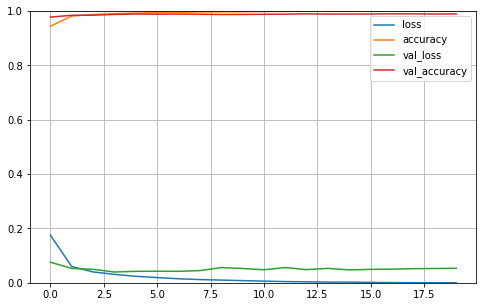

In [52]:
import pandas as pd

pd.DataFrame(histories[best_model_idx].history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

Summary of our best model, model 9 <br>
number of epochs is 20 <br>
size of batch is 32 <br>
stochastic SGD with a learning rate of 0.1 and a momentum of 0.9 <br>
we used ReLU as our activation fucntion in all the layers except for the outplut layer wher we used a softmax activation function <br>
our architecture is as follow: <br>
our first conc layer was 32 filters of size 3x3 followed by a max pool layer <br>
the second conv layer is 32 filters of size 5x5 also followed by a max pool layer <br>
we chose 1 FC layer consisting of 32 neurons followed by an output layer.

